<a href="https://colab.research.google.com/github/Miriamdti/Big_Data/blob/main/An%C3%A1lisisdatos_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Datos de Usuarios de Internet

Python · Internet Prices around 200+ countries in 2022.

In [1]:
# Importando Librerías
import math
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [2]:
df_user=pd.read_csv('https://raw.githubusercontent.com/Miriamdti/Big_Data/main/worldwide%20internet%20users%20-%20users.csv')
df_speed=pd.read_csv('https://raw.githubusercontent.com/Miriamdti/Big_Data/main/worldwide%20internet%20speed%20in%202022%20%20-%20avg%20speed.csv')
df_price=pd.read_csv('https://raw.githubusercontent.com/Miriamdti/Big_Data/main/worldwide%20internet%20prices%20in%202022%20-%20IN%202022.csv')

## Los 5 países con mayor velocidad de Internet

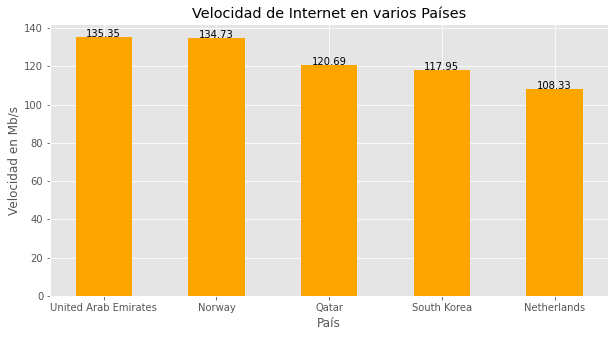

In [3]:
df = df_speed
# df.head()
df.rename(columns = {'Country':'País','Avg \n(Mbit/s)Ookla':'Velocidad(en Mb/s)'}, inplace = True)

df1 = df.sort_values(by=['Velocidad(en Mb/s)'],ascending=False).head(5)
country, speed =  list(df1['País']), list(df1['Velocidad(en Mb/s)'])
fig = plt.figure(figsize = (10, 5))

plt.bar(country, speed, color ='orange',
        width = 0.5)
#Establecer el valor de la velocidad en la parte superior de la gráfica de barras
for i in range(len(country)):
        plt.text(i, speed[i], speed[i], ha = 'center')
        
plt.xlabel("País")
plt.ylabel("Velocidad en Mb/s")
plt.title("Velocidad de Internet en varios Países")
plt.show()

## Porcentaje de usuarios de Internet en los 5 principales países con población máxima

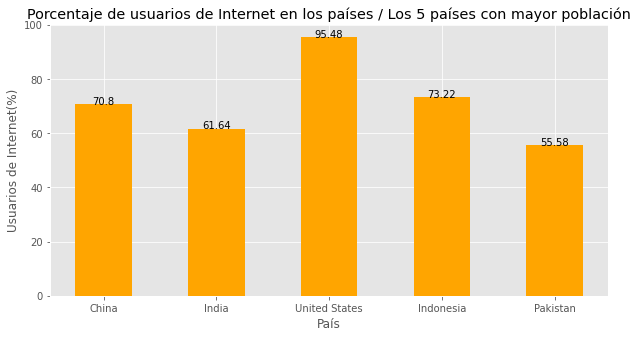

In [4]:
df_new = pd.read_csv('https://raw.githubusercontent.com/Miriamdti/Big_Data/main/worldwide%20internet%20users%20-%20users.csv', decimal = ',')
df_new.head()
df_new.rename(columns = {'Country or area':'País','Internet users':'Usuarios de Internet','Population':'Población'}, inplace = True)

df_new = df_new[pd.notnull(df_new['Población'])]
df_new['Población'] = df_new['Población'].str.replace(',','')
df_new['Usuarios de Internet'] = df_new['Usuarios de Internet'].str.replace(',','')
df_new['Población'] = df_new['Población'].astype(int)
df_new['Usuarios de Internet'] = df_new['Usuarios de Internet'].astype(int)

#Calculando el porcentaje de internautas
df_new['Porcentaje'] = (df_new['Usuarios de Internet']/df_new['Población'])*100

#Ordenar la Población en orden descendente
df1 = df_new.sort_values(by=['Población'],ascending=False).head(5)

País = list(df1['País'])
Porcentaje = list(df1['Porcentaje'])
fig = plt.figure(figsize = (10, 5))

plt.bar(País, Porcentaje, color ='orange',
        width = 0.5)

#Establecer el porcentaje en la parte superior de la gráfica de barras
for i in range(len(País)):
        plt.text(i, Porcentaje[i], round(Porcentaje[i],2), ha = 'center')
        
plt.xlabel("País")
plt.ylabel("Usuarios de Internet(%)")
plt.title("Porcentaje de usuarios de Internet en los países / Los 5 países con mayor población")
plt.show()

### Porcentaje de internautas por Región

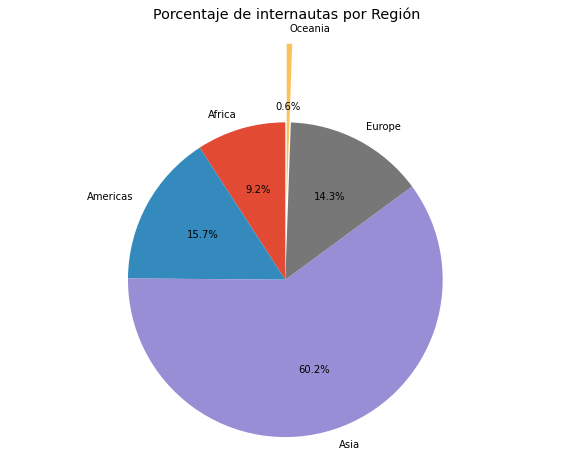

In [5]:
df1 = df_new.groupby('Region')['Usuarios de Internet'].sum()/10**6
region = list(df1.index)
usuarios= list(df1.values)
explode = [0,0,0,0,0.5]
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(usuarios, explode=explode, labels=region, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # La misma relación de aspecto garantiza que el pastel se dibuje como un círculo.
plt.title("Porcentaje de internautas por Región")
plt.show()

### Países con tarifas de datos más baratas y caras

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/Miriamdti/Big_Data/main/worldwide%20internet%20prices%20in%202022%20-%20IN%202022.csv')
df= df[pd.notnull(df['Cheapest 1GB for 30 days (USD)'])]
df1 = df.sort_values(by=['Average price of 1GB (USD)'],ascending=True)

print(f"El país con el precio promedio más barato de datos de 1 GB (USD) es {df1.head(1)['Name'].iloc[0]}")
print(f"El país con el precio promedio más costoso de datos de 1 GB (USD) es {df1.tail(1)['Name'].iloc[0]}")

El país con el precio promedio más barato de datos de 1 GB (USD) es Israel
El país con el precio promedio más costoso de datos de 1 GB (USD) es Kiribati


### Comparación de Planes de Internet en varias Regiones Continentales

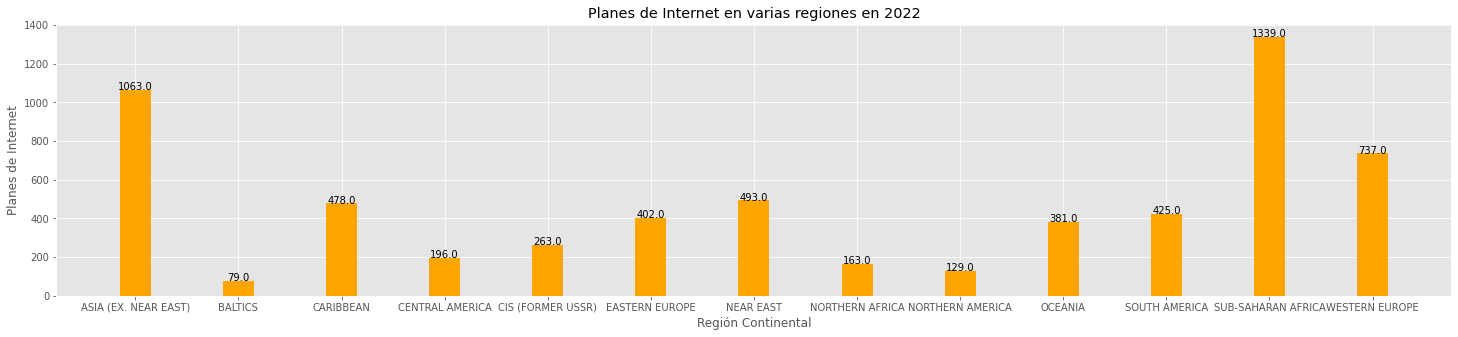

In [7]:
df2 = df.groupby('Continental region')['NO. OF Internet Plans '].sum()
region = list(df2.index)
planes = list(df2.values)

fig = plt.figure(figsize = (25, 5))

plt.bar(region, planes, color ='orange',
        width = 0.3)
#Establecer el valor de los planes en la parte superior de la gráfica de barras
for i in range(len(region)):
        plt.text(i, planes[i], planes[i], ha = 'center')
        
plt.xlabel("Región Continental")
plt.ylabel("Planes de Internet")
plt.title("Planes de Internet en varias regiones en 2022")
plt.show()

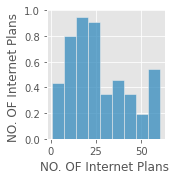

In [8]:
sns.pairplot(df)

[]

<Figure size 432x576 with 0 Axes>

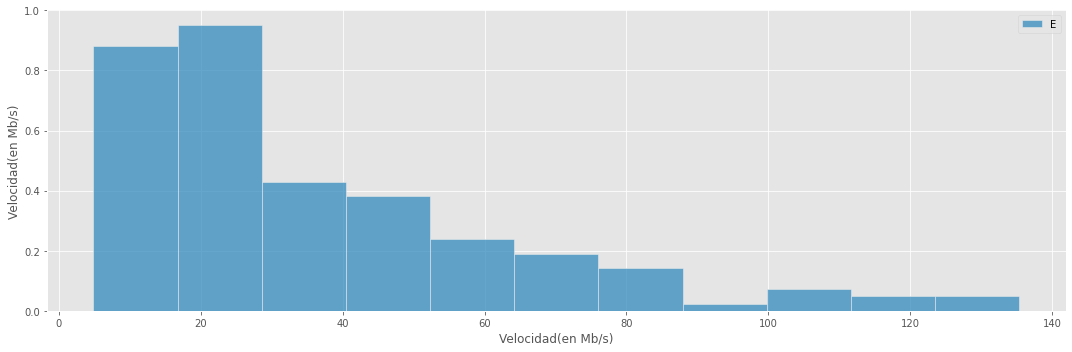

In [9]:
plt.figure(figsize=(6,8))
sns.pairplot(df_speed,hue=None, palette='oranges', kind='scatter',height=5, aspect=3)
plt.legend("ETIQUETA")
plt.tight_layout()
plt.plot()

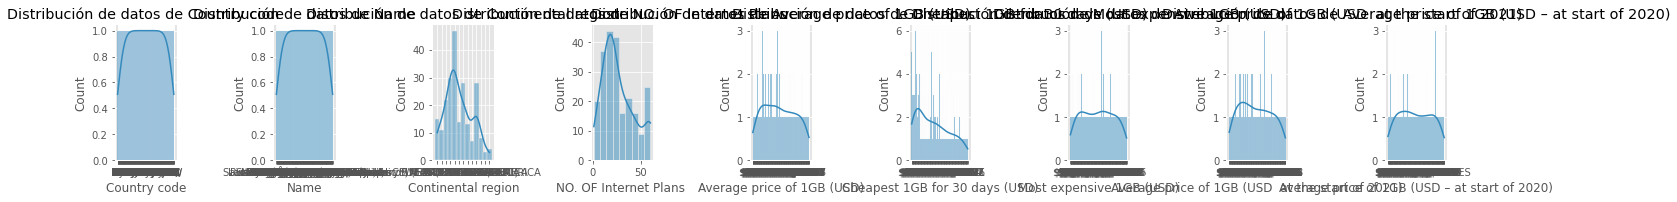

In [10]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df.columns,1):
    plt.subplot(6,9,i)
    plt.title(f"Distribución de datos de {col}")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country code                                      229 non-null    object 
 1   Name                                              230 non-null    object 
 2   Continental region                                230 non-null    object 
 3   NO. OF Internet Plans                             230 non-null    float64
 4   Average price of 1GB (USD)                        230 non-null    object 
 5   Cheapest 1GB for 30 days (USD)                    230 non-null    object 
 6   Most expensive 1GB (USD)                          230 non-null    object 
 7   Average price of 1GB (USD  at the start of 2021)  230 non-null    object 
 8   Average price of 1GB (USD – at start of 2020)     230 non-null    object 
dtypes: float64(1), object(

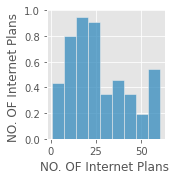

In [13]:
sns.pairplot(df1)

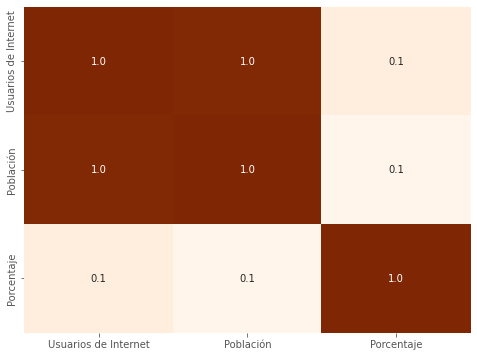

In [22]:
plt.figure(figsize = (8,6))
sns.heatmap(df_new.corr(),annot=True, cbar=False, cmap='Oranges', fmt='.1f')